In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# 1. Data ( Preparing and loading )

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data..)
* DNA
* Text

Machine leaning is a game of two parts:

    1. Get data into numerical representation.
    
    2. Build a model to learn patterns in that numerical represntation.
    
To showcase this, let's create some *known* data using linear regression formula.

We'll use a linear regression formula to make a stright line with known **parameters**.

In [2]:
#create *known* parameters
weight = 0.7 
bias = 0.3

# Create 
start = 0
end = 1
step = 0.02
X = torch.arange(start ,end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

# Splitting data into training and test sets ( one of the most important concepts in machine learning in general)

Let's create a training and test set with our data

In [4]:
#create train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

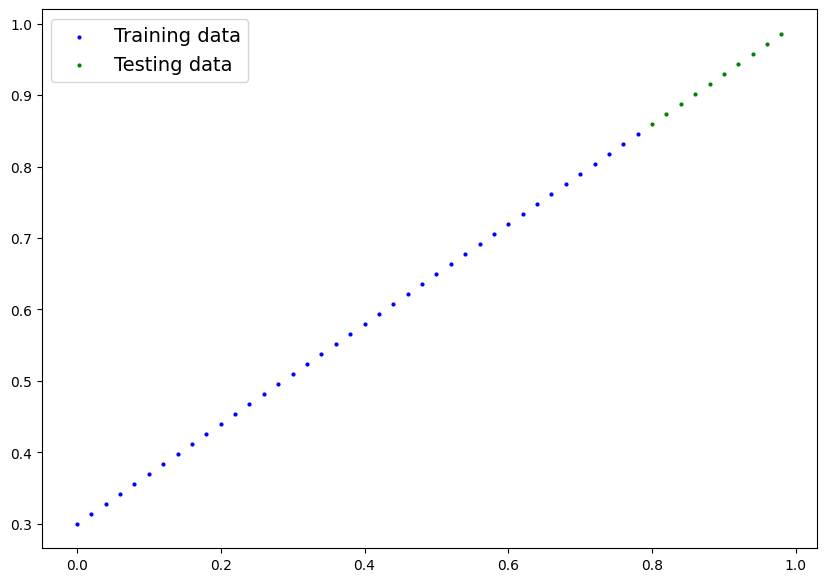

In [5]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10,7))
    
    #Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    #Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    #Are there predictions?
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    #show the lengend
    plt.legend(prop={"size":14})

    
plot_predictions()

# Building Model

Our fitst pytorch model.

What our model does:
* Starts with random values (weights& bias) 
* Look at training data and adjust the random values to better
represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?
Through two main algorithms:
1. Gradient descent https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation https://www.youtube.com/watch?v=Ilg3gGewQ5U

In [6]:
# Create linear regression model class
import torch 
from torch import nn

class LinearRegressionModel(nn.Module): # <- nn.Module Base class from all nueral Network
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,# <- start with a random weight and try to adjust it to the ideal weight.
                                               requires_grad=True, # <- can this parameter be updated via gradient descent?
                                               dtype=torch.float,# <- Pytorch loves the data type torch.float32
                                               ))
        
        self.bias = nn.Parameter(torch.randn(1,# <- start with a random bias and try to adjust it to the ideal bias.
                                               requires_grad=True,# <- can this parameter be updated via gradient descent?
                                               dtype=torch.float,# <- Pytorch loves the data type torch.float32
                                               ))
            
    def forward(self, x: torch.Tensor)-> torch.Tensor:
        return self.weights * x + self.bias
            

https://pytorch.org/tutorials/beginner/ptcheat.html

# Checking the contents of our Pytorch model

Now we've created a model, let's see what's inside..

So we can check out model parameters or what's inside our model using `.parametrs()`

In [7]:
#create a random seed
torch.manual_seed(42)

#create an instance of our model
model_0 = LinearRegressionModel()

#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see hoe well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [9]:
#Make predictions with model
#For more info https://twitter.com/PyTorch/status/1437838231505096708?lang=en

with torch.inference_mode():# another word of predictions is inference.(disable gradient)
    y_preds = model_0(X_test)

    
# #Your also can do it with `no_grad()` 
# with torch.no_grad():
#     y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [10]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

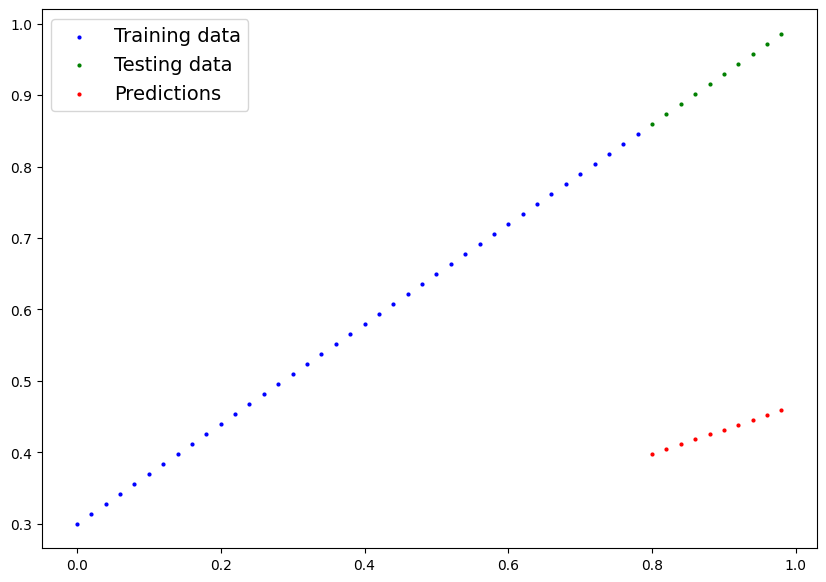

In [11]:
plot_predictions(predictions=y_preds)

# 3. Training model

The whole idea of training is for a model to move from some **unknown** parameters (these may be random) to some **known** parameters.

Or in other words from a poor represntaion of the data to a better represnetation of the data.

One way to measure how poor or how wrong your models predictions are; is to use `loss function`.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we 're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs. lower is better.

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (eg. weight & bias in our case) to improve the loss function. 

And specifically for Pytorch, we need:
* A training loop
* A testing loop

In [12]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
#Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                        lr=0.001) #lr = Learning rate = possibly the most importat hyperparameter.

# Building a training loop ( and a testing loop ) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called fowrard propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [15]:
torch.manual_seed(42)
# An epoch is one loop through the data...( this is a hyperparameter because we set it ourselves)
epochs = 1000
### TRAINING

#0. Loop through the data.
for epochs in range(epochs):
    # Set the model to training mode.
    model_0.train() # train mode in pytorch sets all the parameters that require gradients to require gradients
    
    # 1. Forward pass
    y_pred = model_0(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    
    #5. Step the optimizer (perfrom gradient descent)
    optimizer.step() #by defaukt how the optimizer changes will acculumate the loop so... we have to zero them abouve in step 3 for the next iteration of the loop.
    
    #6. Testing 
    model_0.eval() #Turns off different settings in the model not needed for evaluation/testing (dropout/ batchNorm)
    with torch.inference_mode(): #turns off gradient tracking & couple more things behind the scenes
        #1 . do the forward pass.
        test_pred = model_0(X_test)
        
        #2. Calcluate the loss
        test_loss = loss_fn(test_pred, y_test)
        


In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

In [17]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)


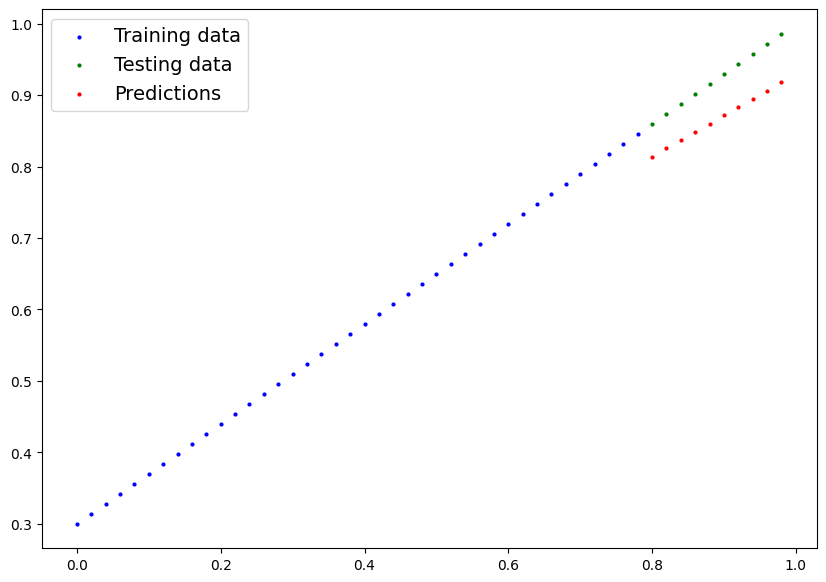

In [18]:
plot_predictions(predictions=y_preds_new)

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

In [20]:
weight, bias

(0.7, 0.3)

# Saving a model in PyTorch

There are three main methods you should about for saving and loading in Pytorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format.
2. `torch.load()` - allows you to load PyTorch object.

In [23]:
# Saving the model.
from pathlib import Path

# 1. Create a models directory
MODEL_PATH= Path("models")
MODEL_PATH.mkdir(parents= True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [3]:
torch.load("models/01_pytorch_workflow_model_0.pth")

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

TypeError: Module.load_state_dict() missing 2 required positional arguments: 'self' and 'state_dict'